In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage


import warnings
warnings.filterwarnings('ignore')

In [3]:
data  = pd.read_csv('./Mall_Customers.csv')
print(data.shape)
data.head(10)

(200, 5)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
print("Cantidad de valores faltantes para CustomerID ",data['CustomerID'].isnull().sum())
print("Cantidad de valores faltantes para Gender ",data['Gender'].isnull().sum())
print("Cantidad de valores faltantes para Age ",data['Age'].isnull().sum())
print("Cantidad de valores faltantes para Annual Income (k$) ",data['Annual Income (k$)'].isnull().sum())
print("Cantidad de valores faltantes para Spending Score (1-100) ",data['Spending Score (1-100)'].isnull().sum())

Cantidad de valores faltantes para CustomerID  0
Cantidad de valores faltantes para Gender  0
Cantidad de valores faltantes para Age  0
Cantidad de valores faltantes para Annual Income (k$)  0
Cantidad de valores faltantes para Spending Score (1-100)  0


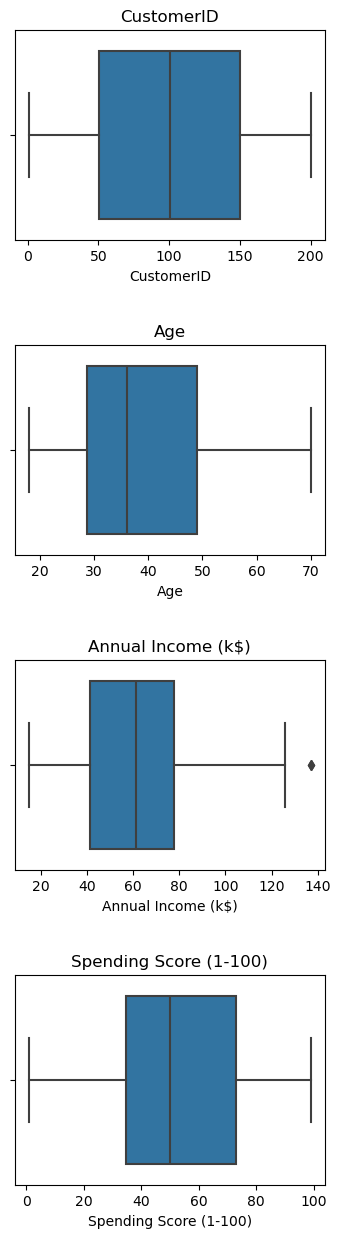

In [8]:
columns_num = ['CustomerID','Age','Annual Income (k$)','Spending Score (1-100)']

fig, ax =plt.subplots(nrows=4,ncols=1,figsize=(4,15))
fig.subplots_adjust(hspace=0.5)

for i,col in enumerate(columns_num):
    sns.boxplot(x=col, data=data, ax=ax[i])
    ax[i].set_title(col)

In [9]:
new_data = data.iloc[:,2:].values
new_data

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [10]:
scaler = StandardScaler()
new_data_scaler = scaler.fit_transform(new_data)

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_data_scaler)

In [12]:
cluster_model = AgglomerativeClustering(n_clusters=3)  # Número de clusters a buscar
clusters = cluster_model.fit_predict(new_data_scaler)

In [13]:
silhouette = silhouette_score(new_data_scaler, clusters)
calinski_harabasz = calinski_harabasz_score(new_data_scaler, clusters)
print("Coeficiente de Silueta:", silhouette)
print("Índice de Calinski-Harabasz:", calinski_harabasz)

Coeficiente de Silueta: 0.32148866683112387
Índice de Calinski-Harabasz: 88.10174149244529


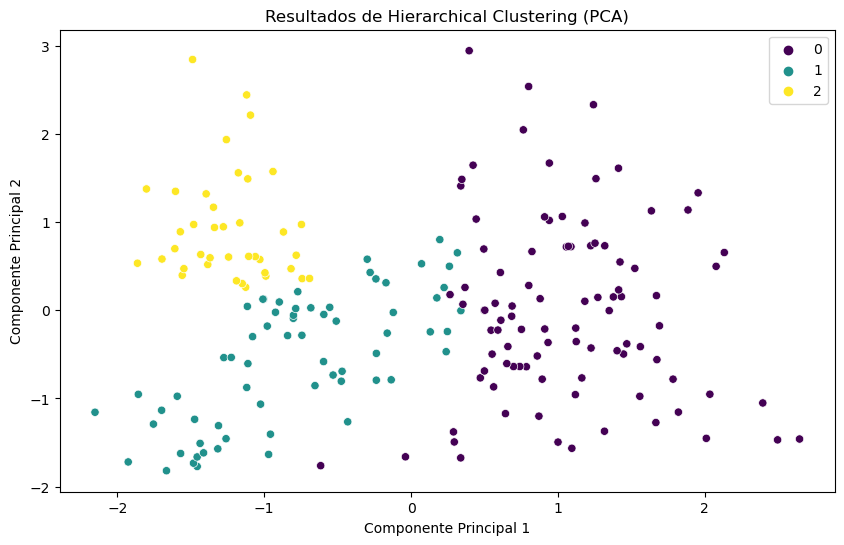

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="viridis", legend="full")
plt.title("Resultados de Hierarchical Clustering (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

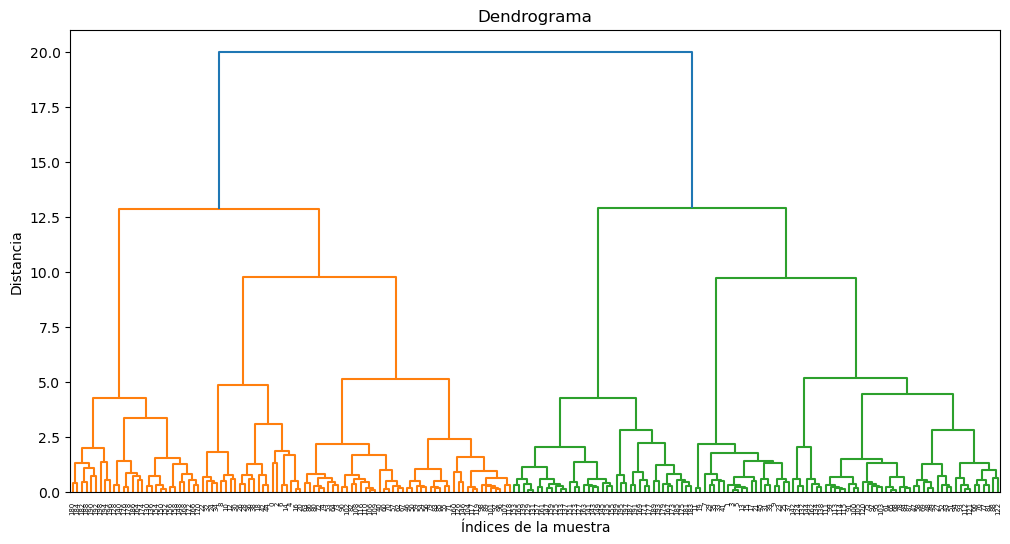

In [15]:
linkage_data = linkage(new_data_scaler, method='ward')

# Grafica el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linkage_data)
plt.title("Dendrograma")
plt.xlabel("Índices de la muestra")
plt.ylabel("Distancia")
plt.show()